In [1]:
# 設定超參數HyperParameters 
batch_size =  64
epochs = 7
image_size = 128
lr=0.01

## 一、載入相關套件

In [2]:
import os
import cv2
import csv
import random
import time
import numpy as np
import pandas as pd
import matplotlib.image as mpimg # mpimg 用於讀取圖片
import matplotlib.pyplot as plt # plt 用於顯示圖片
import seaborn as sns

In [3]:
import tensorflow as tf

from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import utils as np_utils
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, ZeroPadding2D, Dense, Activation, Conv2DTranspose

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [5]:
# Print Start time
from datetime import datetime, timezone
import pytz

tpe = pytz.timezone('Asia/Taipei')
utc_start = datetime.now()
print("Start Time", tpe.fromutc(utc_start))

Start Time 2020-05-29 17:25:30.215153+08:00


## 建立Model

In [6]:
model_resnet = InceptionResNetV2(weights='imagenet', include_top=False)

input = Input( shape=(image_size,image_size,3),name = 'image_input' )
output_conv = model_resnet(input)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
## 由於該問題是分 3 類，需要在最後修改 Dense(3)，softmax 代表 output 是機率  
#Add the fully-connected layers 
p = Flatten()(output_conv)
p = Dense(256,activation = 'relu')(p)
p = Dropout(0.2)(p)
p = Dense(3, activation='softmax', name='predictions')(p)

model = Model(inputs=input, outputs=p)

model_2 = Model(inputs=input, outputs=p)
model_3 = Model(inputs=input, outputs=p)
model_4 = Model(inputs=input, outputs=p)

In [8]:
adam = optimizers.Adam(lr=lr)
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['acc'])


model_2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['acc'])

model_3.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['acc'])

model_4.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['acc'])

## 製作標籤&資料集

In [9]:
from imgGen import imgGenFunc

In [11]:
# Read testing data
x_test, y_test = imgGenFunc(image_size, flip, rotate, "dev.csv", "C1-P1_Dev/")

芒果圖片數量:  800
x_l:  800
y_l:  800


## 訓練
## Test 1

In [10]:
flip = 0; rotate = 0
# Read training data
x_train, y_train = imgGenFunc(image_size, flip, rotate, "train.csv", "C1-P1_Train/")

芒果圖片數量:  5600
x_l:  5600
y_l:  5600


In [12]:
# Model檔名設定
file_name = str(epochs)+'_'+str(batch_size)

In [13]:
# 加入EarlyStopping以及Tensorboard等回調函數
CB = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
TB = keras.callbacks.TensorBoard(log_dir='./log'+"_"+file_name, histogram_freq=1)

In [14]:
datagen = ImageDataGenerator(
    zca_whitening=False,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

In [15]:
datagen.fit(x_train)

In [16]:
### Start Training
history_1 = model.fit(
    datagen.flow(x_train , y_train, batch_size=batch_size),
    epochs = epochs,
    validation_data = (x_test, y_test)
)

Epoch 1/7
88/88 [==============================] - 165s 2s/step - loss: 0.8864 - acc: 0.6421 - val_loss: 17.7122 - val_acc: 0.4500
Epoch 2/7
88/88 [==============================] - 90s 1s/step - loss: 0.6546 - acc: 0.7204 - val_loss: 0.5641 - val_acc: 0.7487
Epoch 3/7
88/88 [==============================] - 91s 1s/step - loss: 0.6137 - acc: 0.7311 - val_loss: 1.0742 - val_acc: 0.3850
Epoch 4/7
88/88 [==============================] - 91s 1s/step - loss: 0.6058 - acc: 0.7320 - val_loss: 0.6528 - val_acc: 0.7300
Epoch 5/7
88/88 [==============================] - 91s 1s/step - loss: 0.5756 - acc: 0.7504 - val_loss: 0.8080 - val_acc: 0.6712
Epoch 6/7
88/88 [==============================] - 90s 1s/step - loss: 0.5775 - acc: 0.7516 - val_loss: 0.7489 - val_acc: 0.6475
Epoch 7/7
88/88 [==============================] - 91s 1s/step - loss: 0.5794 - acc: 0.7482 - val_loss: 77.6019 - val_acc: 0.4625


In [17]:
# Print Finish Training time
tpe = pytz.timezone('Asia/Taipei')
utc_finish = datetime.now()
print("Finish Training Time", tpe.fromutc(utc_finish))

difference = utc_finish-utc_start
seconds_in_day = 24 * 60 * 60
divmod(difference.days * seconds_in_day + difference.seconds, 60)

Finish Training Time 2020-05-29 17:39:16.256406+08:00


(13, 46)

## 繪製Model學習成效

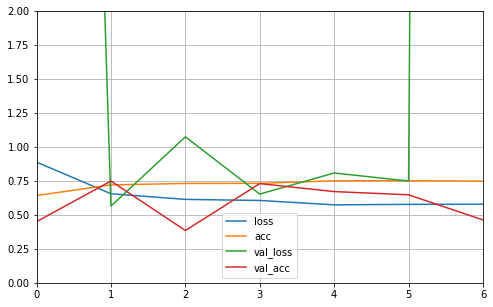

In [18]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,2)
    plt.show()
    
plot_learning_curves(history_1)

## 測試集預測準確度

In [19]:
# 測試集標籤預測
y_pred = model.predict(x_test)

In [20]:
# 模型預測後的標籤
predict_label = np.argmax(y_pred,axis=1)
print(predict_label)

[2 0 2 0 0 1 2 0 0 0 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 1 1 2 2 2 2 2 2 2 0 0 2
 2 0 2 2 2 2 0 2 0 2 0 2 2 2 0 2 1 2 0 2 0 1 2 2 0 0 2 0 2 2 2 2 2 2 2 0 0
 2 2 2 2 2 2 2 2 2 2 2 1 1 2 0 0 2 2 2 0 2 0 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0
 1 2 2 2 2 2 2 2 2 1 2 0 2 2 2 2 1 0 2 0 0 2 2 2 2 2 0 0 0 0 2 2 2 0 1 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 0 2 2 0 2 0 2 2 2 2 1 2 2 0 2 2 2 2 2 2
 0 0 2 0 2 2 2 2 0 0 2 2 1 2 0 2 2 2 0 2 1 2 2 2 1 0 2 0 2 2 2 2 2 2 1 2 0
 2 0 2 1 0 2 2 0 2 2 2 2 2 2 0 2 0 2 0 2 0 0 2 2 1 2 2 2 2 2 2 2 2 2 0 2 0
 2 2 2 2 0 2 2 2 0 1 0 2 1 2 2 0 2 2 2 2 2 2 0 0 2 1 2 2 0 2 0 2 0 1 2 2 2
 2 0 0 2 2 2 2 0 2 2 2 2 2 0 0 2 0 0 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2
 2 1 2 1 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 0 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2
 2 2 2 2 0 2 2 0 2 2 2 2 2 0 2 1 2 2 2 2 2 2 0 0 2 2 2 2 2 1 2 1 2 1 2 2 2
 0 2 1 2 2 2 2 0 2 2 1 2 

In [21]:
# 模型原標籤
true_label = np.argmax(y_test,axis=1)
print(true_label)

[2 0 0 1 0 2 2 0 2 2 2 1 0 0 2 0 0 1 0 1 0 0 2 1 1 1 1 2 1 2 0 0 2 2 0 0 2
 1 0 2 1 0 1 0 2 0 1 1 2 2 0 1 2 2 1 1 1 0 1 2 0 1 1 1 0 0 0 2 1 1 2 1 0 1
 0 0 2 0 2 2 1 0 2 0 1 1 1 1 0 1 1 2 0 0 1 0 1 0 1 2 2 2 1 1 0 2 2 0 1 1 0
 1 2 0 1 2 2 0 2 2 1 1 0 1 2 2 2 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 2 0 0 2 1 1
 0 1 1 2 0 2 2 1 2 2 2 0 2 1 1 0 1 1 2 2 0 2 0 0 0 0 2 2 0 1 0 2 2 2 2 0 2
 0 1 1 0 0 2 2 2 1 0 1 2 1 0 0 1 2 0 1 0 2 1 2 0 1 0 1 2 2 1 2 2 2 2 1 2 0
 1 2 0 1 0 2 2 0 0 1 1 0 2 0 0 2 1 2 0 0 0 0 2 2 1 1 0 0 1 1 1 1 0 1 0 2 1
 0 2 2 2 1 0 1 2 1 1 0 2 2 2 1 1 1 1 1 2 1 0 0 1 2 1 1 0 0 0 2 1 0 1 0 1 2
 1 0 1 0 0 1 2 0 2 0 1 2 2 2 1 2 2 1 2 2 0 1 2 0 1 2 2 2 0 2 1 0 1 1 1 2 1
 1 1 2 0 1 1 1 2 1 0 1 1 1 1 1 2 1 1 1 2 0 2 1 2 0 1 1 1 2 0 2 1 0 1 0 1 0
 1 0 1 1 2 0 0 1 0 1 2 1 1 2 2 1 2 0 1 0 1 0 0 1 2 1 0 0 0 2 1 0 2 1 2 0 2
 1 1 2 1 1 0 0 0 2 0 2 0 2 1 2 0 0 0 1 2 1 0 0 2 1 2 2 0 2 1 0 1 1 1 0 2 2
 2 2 2 1 0 2 0 0 1 1 2 0 1 2 0 1 2 1 1 0 2 2 0 0 1 2 2 1 0 1 2 0 2 1 1 1 2
 1 0 0 1 2 1 2 0 2 0 1 2 

In [22]:
pd.crosstab(true_label,predict_label,rownames=['實際值'],colnames=['預測值'])

預測值,0,1,2
實際值,,,
0,96,6,141
1,48,43,202
2,16,17,231


In [23]:
# 整體準確度
count = 0
for i in range(len(y_pred)):
    if(np.argmax(y_pred[i]) == np.argmax(y_test[i])): #argmax函数找到最大值的索引，即为其类别
        count += 1
score = count/len(y_pred)
print('正确率为:%.2f%s' % (score*100,'%'))

正确率为:46.25%


In [24]:
# 儲存模型相關參數
# model.save('h5/'+file_name+'.h5')

## Test 2

In [25]:
flip = 0; rotate = 1
x_train, y_train = imgGenFunc(image_size, flip, rotate, "train.csv", "C1-P1_Train/")

芒果圖片數量:  5600
x_l:  16800
y_l:  16800


In [26]:
# Print Start time
from datetime import datetime, timezone
import pytz

tpe = pytz.timezone('Asia/Taipei')
utc_start = datetime.now()
print("Start Time", tpe.fromutc(utc_start))

Start Time 2020-05-29 17:40:44.609438+08:00


In [27]:
datagen.fit(x_train)

In [28]:
### Start Training
history_2 = model_2.fit(
    datagen.flow(x_train , y_train, batch_size=batch_size),
    epochs = epochs,
    validation_data = (x_test, y_test)
)

Epoch 1/7
263/263 [==============================] - 339s 1s/step - loss: 0.5837 - acc: 0.7482 - val_loss: 2827.4585 - val_acc: 0.6812
Epoch 2/7
263/263 [==============================] - 267s 1s/step - loss: 0.5409 - acc: 0.7618 - val_loss: 0.5101 - val_acc: 0.7962
Epoch 3/7
263/263 [==============================] - 267s 1s/step - loss: 0.5477 - acc: 0.7678 - val_loss: 0.5430 - val_acc: 0.7613
Epoch 4/7
263/263 [==============================] - 266s 1s/step - loss: 0.5539 - acc: 0.7581 - val_loss: 1.0534 - val_acc: 0.4512
Epoch 5/7
263/263 [==============================] - 264s 1s/step - loss: 0.6211 - acc: 0.7227 - val_loss: 0.5572 - val_acc: 0.7675
Epoch 6/7
263/263 [==============================] - 266s 1s/step - loss: 0.6837 - acc: 0.6948 - val_loss: 0.6404 - val_acc: 0.7200
Epoch 7/7
263/263 [==============================] - 268s 1s/step - loss: 0.6094 - acc: 0.7235 - val_loss: 0.5757 - val_acc: 0.7312


In [29]:
# Print Finish Training time
tpe = pytz.timezone('Asia/Taipei')
utc_finish = datetime.now()
print("Finish Training Time", tpe.fromutc(utc_finish))

difference = utc_finish-utc_start
seconds_in_day = 24 * 60 * 60
divmod(difference.days * seconds_in_day + difference.seconds, 60)

Finish Training Time 2020-05-29 18:13:05.707038+08:00


(32, 21)

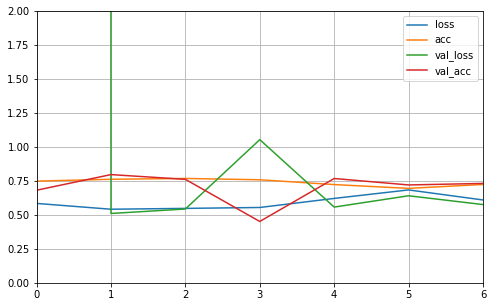

In [30]:
plot_learning_curves(history_2)

In [31]:
# 測試集標籤預測
y_pred = model_2.predict(x_test)

In [32]:
# 模型預測後的標籤
predict_label = np.argmax(y_pred,axis=1)
print(predict_label)
# print(len(predict_label))

[2 1 0 0 0 1 2 0 1 1 2 2 0 1 2 0 0 1 0 0 1 0 2 0 0 1 1 1 1 2 1 0 2 1 0 0 2
 1 0 1 0 0 2 0 1 0 2 1 1 2 0 1 2 2 1 1 1 0 1 2 0 0 1 1 0 2 0 2 1 0 2 1 0 1
 0 0 2 0 2 1 0 0 2 0 1 1 1 1 0 2 1 2 0 0 2 0 2 0 2 2 1 1 0 1 0 1 2 0 0 0 0
 1 1 0 1 1 2 0 2 1 1 1 0 1 2 2 2 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 2 0 0 2 2 1
 0 1 1 1 0 0 2 1 2 2 1 0 2 0 0 0 1 0 1 2 1 2 0 0 0 1 1 1 0 1 0 2 2 2 2 0 2
 1 0 1 1 0 2 2 2 1 1 1 1 1 0 0 1 1 0 1 1 1 1 2 1 1 1 2 2 2 1 1 2 1 2 1 1 0
 2 2 0 1 0 2 2 0 0 0 1 1 1 0 1 2 1 2 1 0 0 0 2 2 1 1 0 0 1 1 0 1 1 1 0 2 1
 0 2 2 2 1 1 1 2 0 1 0 2 1 2 1 0 1 0 0 2 1 0 0 1 2 2 2 0 0 1 2 2 0 1 0 1 2
 0 0 0 0 0 1 2 0 2 0 1 2 1 2 1 2 1 0 1 2 1 1 1 0 1 2 1 2 0 2 1 0 1 1 0 2 1
 1 1 1 1 1 0 1 2 1 0 1 0 1 1 1 2 1 0 0 2 0 2 0 1 0 1 1 2 2 0 2 1 0 1 0 1 0
 2 0 1 1 2 0 0 1 0 1 2 1 1 2 1 1 1 0 2 1 1 1 0 1 1 1 0 1 0 2 2 0 2 1 2 0 2
 2 1 2 1 1 0 0 0 2 0 2 0 2 1 2 0 0 0 1 1 0 0 0 2 1 1 2 0 1 1 0 0 1 1 0 2 2
 2 2 2 1 1 2 0 0 1 1 2 1 1 1 0 1 2 1 1 0 1 1 0 0 1 2 1 1 0 1 1 0 2 1 0 2 2
 0 0 1 1 2 1 2 1 2 0 1 2 

In [33]:
pd.crosstab(true_label,predict_label,rownames=['實際值'],colnames=['預測值'])

預測值,0,1,2
實際值,,,
0,195,46,2
1,63,207,23
2,3,78,183


In [34]:
# 整體準確度
count = 0
for i in range(len(y_pred)):
    if(np.argmax(y_pred[i]) == np.argmax(y_test[i])): #argmax函数找到最大值的索引，即为其类别
        count += 1
score = count/len(y_pred)
print('正确率为:%.2f%s' % (score*100,'%'))

正确率为:73.12%


## Test 3

In [35]:
flip = 1; rotate = 0
x_train, y_train = imgGenFunc(image_size, flip, rotate, "train.csv", "C1-P1_Train/")

芒果圖片數量:  5600
x_l:  22400
y_l:  22400


In [36]:
# Print Start time
from datetime import datetime, timezone
import pytz

tpe = pytz.timezone('Asia/Taipei')
utc_start = datetime.now()
print("Start Time", tpe.fromutc(utc_start))

Start Time 2020-05-29 18:14:36.570300+08:00


In [37]:
datagen.fit(x_train)

In [38]:
### Start Training
history_3 = model_3.fit(
    datagen.flow(x_train , y_train, batch_size=batch_size),
    epochs = epochs,
    validation_data = (x_test, y_test)
)

Epoch 1/7
350/350 [==============================] - 437s 1s/step - loss: 0.5752 - acc: 0.7446 - val_loss: 0.5638 - val_acc: 0.7475
Epoch 2/7
350/350 [==============================] - 356s 1s/step - loss: 0.5507 - acc: 0.7554 - val_loss: 0.6171 - val_acc: 0.7063
Epoch 3/7
350/350 [==============================] - 353s 1s/step - loss: 0.5327 - acc: 0.7648 - val_loss: 0.5650 - val_acc: 0.7875
Epoch 4/7
350/350 [==============================] - 353s 1s/step - loss: 0.5012 - acc: 0.7787 - val_loss: 7.8998 - val_acc: 0.7563
Epoch 5/7
350/350 [==============================] - 353s 1s/step - loss: 0.4881 - acc: 0.7833 - val_loss: 0.4845 - val_acc: 0.8037
Epoch 6/7
350/350 [==============================] - 353s 1s/step - loss: 0.4684 - acc: 0.7927 - val_loss: 0.4994 - val_acc: 0.7738
Epoch 7/7
350/350 [==============================] - 352s 1s/step - loss: 0.4608 - acc: 0.8013 - val_loss: 0.4675 - val_acc: 0.8138


In [39]:
# Print Finish Training time
tpe = pytz.timezone('Asia/Taipei')
utc_finish = datetime.now()
print("Finish Training Time", tpe.fromutc(utc_finish))

difference = utc_finish-utc_start
seconds_in_day = 24 * 60 * 60
divmod(difference.days * seconds_in_day + difference.seconds, 60)

Finish Training Time 2020-05-29 18:57:19.537333+08:00


(42, 42)

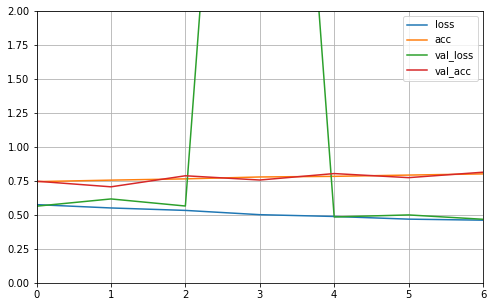

In [40]:
plot_learning_curves(history_3)

In [41]:
# 測試集標籤預測
y_pred = model_3.predict(x_test)

In [42]:
# 模型預測後的標籤
predict_label = np.argmax(y_pred,axis=1)
print(predict_label)
# print(len(predict_label))

[2 0 0 0 0 1 2 0 1 0 2 2 0 0 2 0 0 1 0 0 1 0 2 1 0 1 1 2 1 2 0 0 2 2 0 0 2
 1 0 2 0 0 2 0 2 0 2 1 2 2 0 1 1 2 1 1 2 0 1 2 0 0 1 0 0 0 0 2 1 0 2 1 0 1
 0 0 2 0 2 2 1 1 2 0 1 1 1 1 0 2 1 2 1 0 1 0 2 0 2 2 1 2 1 1 0 2 2 0 1 1 0
 1 1 0 1 2 2 1 2 2 1 1 0 1 2 2 1 1 1 1 0 1 1 1 2 1 1 0 1 0 0 1 2 0 0 2 2 1
 0 1 1 2 0 0 2 1 2 2 1 0 2 0 1 0 1 1 1 2 0 2 0 0 0 1 1 2 0 1 0 2 2 2 2 0 2
 1 1 1 1 0 2 2 1 1 1 1 2 1 0 0 1 1 0 1 0 2 1 2 1 1 1 2 2 1 1 2 2 2 2 1 2 0
 1 2 0 1 0 2 2 0 0 0 1 0 2 0 0 2 1 2 0 1 0 0 2 2 1 1 0 1 1 1 0 1 1 1 0 2 1
 0 2 2 2 1 0 1 2 0 1 0 2 1 2 1 0 1 1 0 2 1 0 0 1 2 1 1 0 0 1 0 1 0 1 1 1 2
 0 0 1 0 0 1 2 0 2 1 1 2 2 2 1 2 1 1 2 2 0 1 2 0 1 2 2 2 0 2 1 0 1 1 1 2 1
 1 1 2 1 1 0 1 2 1 0 1 1 1 1 1 2 1 1 0 2 0 2 0 1 0 1 1 0 2 0 2 1 0 1 0 1 0
 2 0 1 1 2 0 0 1 0 1 2 1 1 2 2 1 1 0 2 2 1 0 1 1 2 2 0 1 0 2 1 0 2 1 2 0 2
 2 1 2 1 1 0 1 0 2 0 2 0 2 1 2 0 0 0 1 2 1 0 0 1 1 2 2 0 1 1 0 1 1 1 0 2 2
 2 2 2 1 0 2 0 0 1 1 2 1 1 1 0 1 2 1 1 0 2 2 1 0 1 2 2 1 1 1 2 0 2 1 1 1 2
 1 0 1 1 1 1 2 1 2 0 1 2 

In [43]:
pd.crosstab(true_label,predict_label,rownames=['實際值'],colnames=['預測值'])

預測值,0,1,2
實際值,,,
0,199,42,2
1,43,231,19
2,6,37,221


In [44]:
# 整體準確度
count = 0
for i in range(len(y_pred)):
    if(np.argmax(y_pred[i]) == np.argmax(y_test[i])): #argmax函数找到最大值的索引，即为其类别
        count += 1
score = count/len(y_pred)
print('正确率为:%.2f%s' % (score*100,'%'))

正确率为:81.38%


## Test 4

In [45]:
flip = 1; rotate = 1
x_train, y_train = imgGenFunc(image_size, flip, rotate, "train.csv", "C1-P1_Train/")

芒果圖片數量:  5600
x_l:  33600
y_l:  33600


In [46]:
# Print Start time
from datetime import datetime, timezone
import pytz

tpe = pytz.timezone('Asia/Taipei')
utc_start = datetime.now()
print("Start Time", tpe.fromutc(utc_start))

Start Time 2020-05-29 18:58:58.551646+08:00


In [47]:
datagen.fit(x_train)

In [48]:
### Start Training
history_4 = model_4.fit(
    datagen.flow(x_train , y_train, batch_size=batch_size),
    epochs = epochs,
    validation_data = (x_test, y_test)
)

Epoch 1/7
525/525 [==============================] - 611s 1s/step - loss: 0.4794 - acc: 0.7882 - val_loss: 0.5413 - val_acc: 0.7563
Epoch 2/7
525/525 [==============================] - 528s 1s/step - loss: 0.5147 - acc: 0.7704 - val_loss: 0.5795 - val_acc: 0.7613
Epoch 3/7
525/525 [==============================] - 525s 999ms/step - loss: 0.5341 - acc: 0.7715 - val_loss: 1.2142 - val_acc: 0.7538
Epoch 4/7
525/525 [==============================] - 524s 998ms/step - loss: 0.4883 - acc: 0.7889 - val_loss: 0.4851 - val_acc: 0.7925
Epoch 5/7
525/525 [==============================] - 524s 999ms/step - loss: 0.4502 - acc: 0.8062 - val_loss: 0.4655 - val_acc: 0.8012
Epoch 6/7
525/525 [==============================] - 525s 999ms/step - loss: 0.4489 - acc: 0.8075 - val_loss: 0.5114 - val_acc: 0.7812
Epoch 7/7
525/525 [==============================] - 526s 1s/step - loss: 0.4506 - acc: 0.8045 - val_loss: 0.4812 - val_acc: 0.7975


In [49]:
# Print Finish Training time
tpe = pytz.timezone('Asia/Taipei')
utc_finish = datetime.now()
print("Finish Training Time", tpe.fromutc(utc_finish))

difference = utc_finish-utc_start
seconds_in_day = 24 * 60 * 60
divmod(difference.days * seconds_in_day + difference.seconds, 60)

Finish Training Time 2020-05-29 20:01:48.979443+08:00


(62, 50)

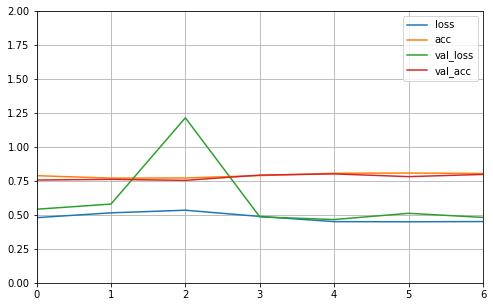

In [50]:
plot_learning_curves(history_4)

In [51]:
# 測試集標籤預測
y_pred = model_4.predict(x_test)

In [52]:
# 模型預測後的標籤
predict_label = np.argmax(y_pred,axis=1)
print(predict_label)
# print(len(predict_label))

[2 1 0 0 0 1 2 0 0 0 1 2 0 0 2 0 0 1 0 0 0 0 2 1 0 1 1 2 1 2 0 0 2 0 0 0 2
 1 0 2 0 0 2 0 2 0 2 1 2 2 0 1 1 1 1 1 1 1 1 2 0 0 1 0 0 0 0 2 1 0 2 1 0 1
 0 0 2 0 2 2 1 1 2 0 1 1 1 1 0 1 1 2 1 0 1 0 2 0 2 2 1 2 1 1 0 2 2 0 1 1 0
 1 1 0 1 2 2 0 2 2 1 1 0 0 2 2 2 1 0 0 0 1 1 0 2 1 0 0 0 0 0 1 2 1 0 2 1 1
 0 1 1 2 0 0 2 1 2 2 2 0 2 0 0 0 1 0 1 1 0 2 0 0 0 1 1 1 0 0 0 2 2 2 2 0 2
 1 0 1 1 1 2 2 2 0 0 1 2 1 0 0 1 1 0 1 0 2 2 2 1 1 1 2 2 2 1 2 2 2 2 1 2 0
 2 2 0 1 0 2 2 1 0 0 1 1 2 0 0 2 1 2 0 0 0 0 2 2 1 1 0 0 1 2 1 0 1 1 0 2 1
 0 2 2 2 1 0 1 2 0 2 0 2 1 2 1 0 0 1 0 2 1 0 0 0 2 2 1 0 0 1 2 1 0 1 0 1 2
 0 0 1 0 0 1 2 0 2 0 1 2 2 2 1 2 1 1 2 2 0 1 2 0 1 1 2 2 0 2 1 0 1 1 1 2 1
 1 1 2 1 1 0 1 2 1 0 2 1 1 1 1 2 1 0 0 2 0 2 0 1 0 1 1 0 2 0 2 0 0 1 0 1 0
 2 0 1 1 2 0 0 1 0 1 2 1 1 2 2 1 2 0 2 0 1 0 0 1 2 2 0 0 0 2 1 0 2 2 2 0 2
 2 1 2 1 1 0 0 0 2 0 2 0 2 1 2 0 0 0 1 2 1 0 0 1 2 2 2 0 2 1 0 1 1 1 1 2 2
 2 2 2 1 0 2 0 0 1 1 2 1 1 1 0 1 2 2 1 0 2 2 0 0 1 1 2 1 0 1 2 0 2 1 1 1 2
 1 0 1 1 1 1 2 0 2 0 1 2 

In [53]:
pd.crosstab(true_label,predict_label,rownames=['實際值'],colnames=['預測值'])

預測值,0,1,2
實際值,,,
0,212,31,0
1,57,206,30
2,7,37,220


In [54]:
# 整體準確度
count = 0
for i in range(len(y_pred)):
    if(np.argmax(y_pred[i]) == np.argmax(y_test[i])): #argmax函数找到最大值的索引，即为其类别
        count += 1
score = count/len(y_pred)
print('正确率为:%.2f%s' % (score*100,'%'))

正确率为:79.75%
